In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.pyplot as plt

UsageError: Line magic function `%matplotlib.pyplot` not found.


In [34]:
df = pd.read_csv("Admission_Prediction.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [35]:
df.shape

(500, 9)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


### GRE Score, TOEFL Score and University Rating have null value

In [37]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [38]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [39]:
df['University Rating'].value_counts()

3.0    154
2.0    124
4.0    103
5.0     72
1.0     32
Name: University Rating, dtype: int64

In [40]:
# Filling Missing values

df['GRE Score'].fillna(df['GRE Score'].mean(),inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(),inplace=True)
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

# Checking null values
df.isna().sum()

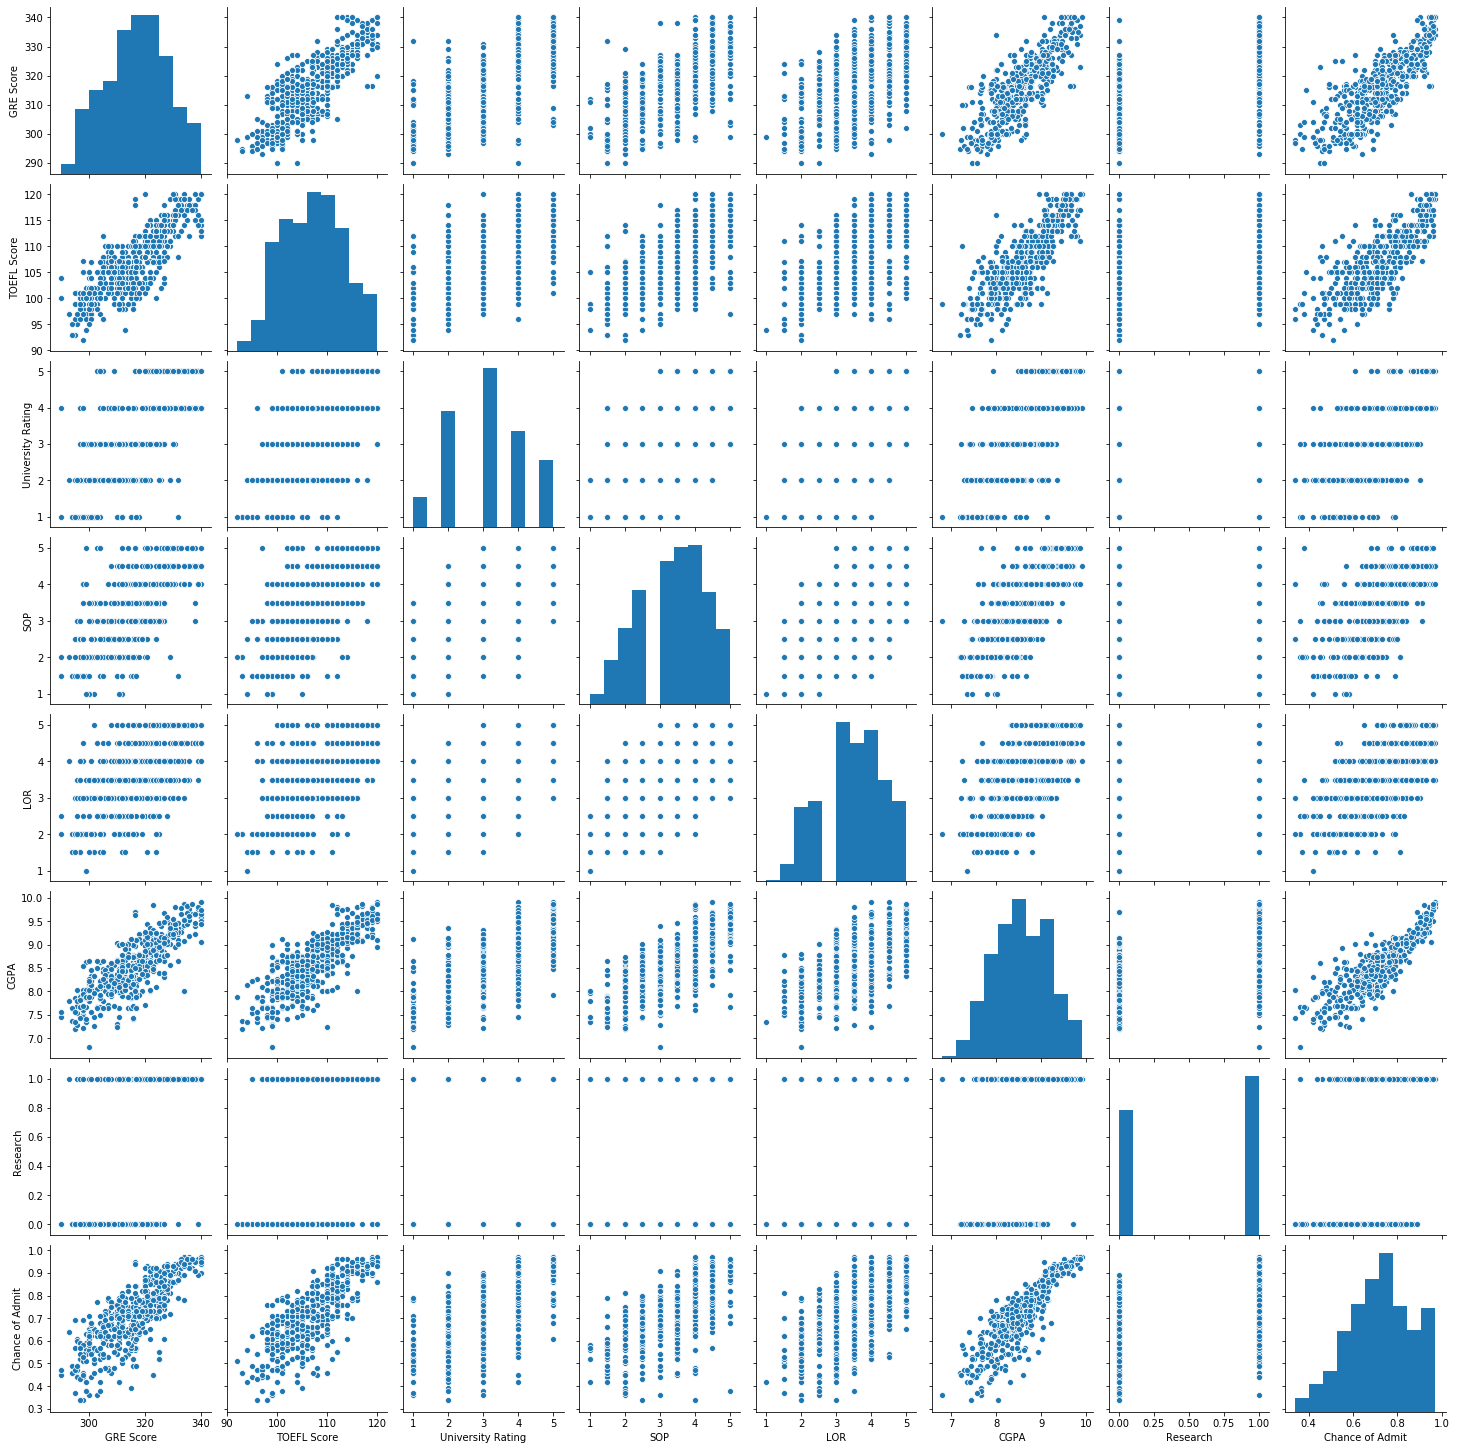

In [51]:
sns.pairplot(df.drop(['Serial No.'],axis=1))

In [42]:
x = df.drop(['Serial No.','Chance of Admit'],axis=1)
y = df['Chance of Admit']

In [43]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [52]:
from sklearn.preprocessing  import StandardScaler
std_scale = StandardScaler()
scaled_data = std_scale.fit_transform(x)

In [53]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(scaled_data,y,test_size=0.2,random_state=0)

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
reg.score(train_x,train_y)

0.8319991275688701

In [59]:
reg.score(test_x,test_y)

0.7588343236564545

In [62]:
from sklearn.metrics import r2_score,mean_squared_error
print("train mse : ",mean_squared_error(train_y,reg.predict(train_x)))
print("test mse : ",mean_squared_error(test_y,reg.predict(test_x)))

train mse :  0.0034220261506347468
test mse :  0.004211898245920936


In [63]:
print("train r2score : ",r2_score(train_y,reg.predict(train_x)))
print("test r2score : ",r2_score(test_y,reg.predict(test_x)))

train r2score :  0.8319991275688701
test r2score :  0.7588343236564545


In [65]:
import pickle
filename = "adimission_chance_reg_model.pickle"
pickle.dump(reg,open(filename,'wb'))

In [66]:
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict(std_scale.transform([[300,100,2.0,4.0,3.0,8.2,0]]))
a

array([0.59208692])